In [26]:
import numpy as np
import pandas as pd

from dataprep.eda import *
# import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("FINAL_USO.csv", na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df = data.copy()

In [6]:
info_or = df[df.columns[:6]]

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

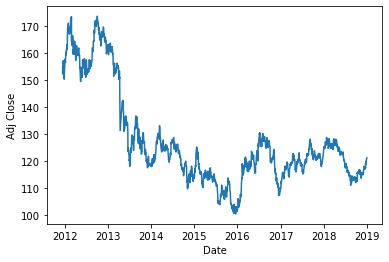

In [32]:
sns.lineplot(x=info_or.index, y=info_or['Adj Close'], data=info_or)

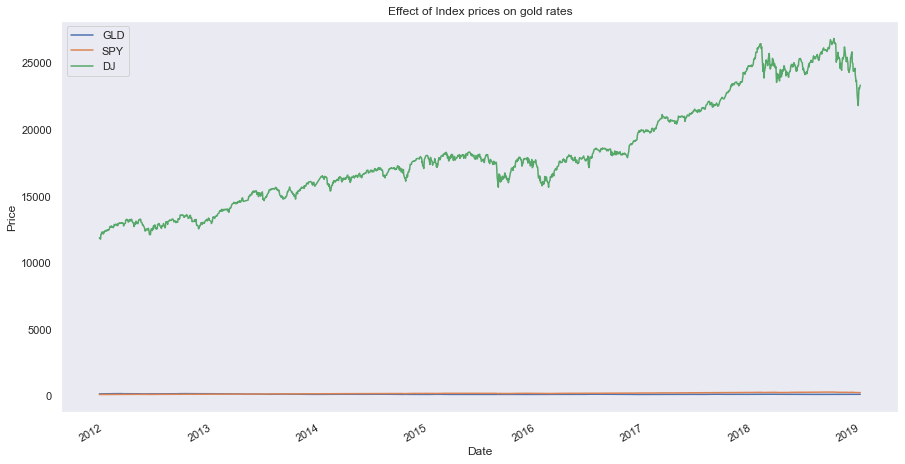

In [60]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close  = df['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [93]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['Adj Close'],
                        mode='lines', name='Prix Ajusté'))
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['Open'],
                        mode='lines', name="Prix d'Ouverture"))
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['Close'],
                        mode='lines', name='Prix de Clôture',
                        ))

fig.update_layout(title="Prix de l'Or 2012 - 2018",
                  xaxis_title="Date", yaxis_title="Prix en $")
# fig.update_layout(
# xaxis=dict(
# showline=True, showgrid=False, showticklabels=True,
# linecolor='rgb(204, 204, 204)',
# linewidth=2, ticks='outside', tickfont=dict(
# family='Arial', size=12, color='rgb(82, 82, 82)'
# ),
# ),
# yaxis=dict(showgrid=False, zeroline=False, showline=False, showticklabels=False),
# autosize=False,
# margin=dict(
# autoexpand=False, l=100, r=20, t=110),
# showlegend=False, plot_bgcolor='white')

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['Adj Close'],
                        mode='lines', name='Prix Ajusté'))
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['High'],
                        mode='lines', name="Prix le plus élevé"))
fig.add_trace(go.Scatter(x=info_or.index, y=info_or['Low'],
                        mode='lines', name='Prix le plus bas',
                        ))

fig.update_layout(title="Prix de l'Or 2012 - 2018",
                  xaxis_title="Date", yaxis_title="Prix en $")
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [5]:
val_aj_close = ["Adj Close", "SP_Ajclose", "DJ_Ajclose", "EG_Ajclose", "GDX_Adj Close", "USO_Adj Close"]
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [88]:
ajusted_prices = df[val_aj_close]

In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ajusted_prices.index, y=ajusted_prices['Adj Close'],
                        mode='lines+markers', name="Prix: OR"))
for col in ajusted_prices.columns[1:]:
    fig.add_trace(go.Scatter(x=ajusted_prices.index, y=ajusted_prices[col],
                        mode='lines', name=col))
    

fig.update_layout(title="Différent Prix Ajusté",
                  xaxis_title="Date", yaxis_title="Prix en $")
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [98]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'],
                        mode='lines+markers', name="Prix: OR"))

for col in df.columns:
    if 'close' in col:
#         print(col)
        fig.add_trace(go.Scatter(x=df.index, y=df[col],
                    mode='lines', name=col))


fig.update_layout(title="Comparaison des prix de Clôtures",
                  xaxis_title="Date", yaxis_title="Prix en $")
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

<Figure size 864x432 with 0 Axes>

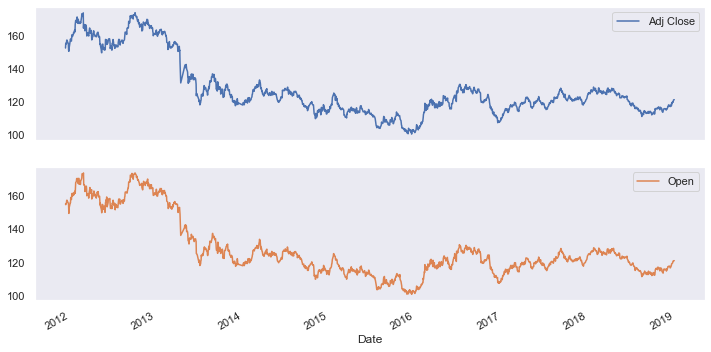

<Figure size 864x432 with 0 Axes>

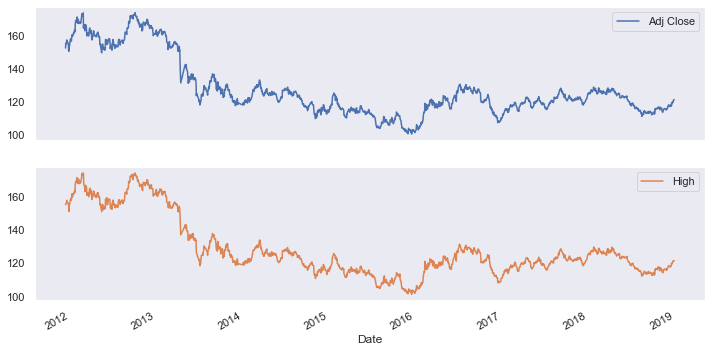

<Figure size 864x432 with 0 Axes>

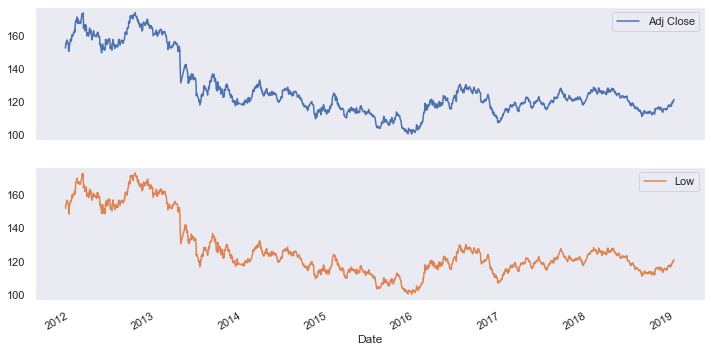

<Figure size 864x432 with 0 Axes>

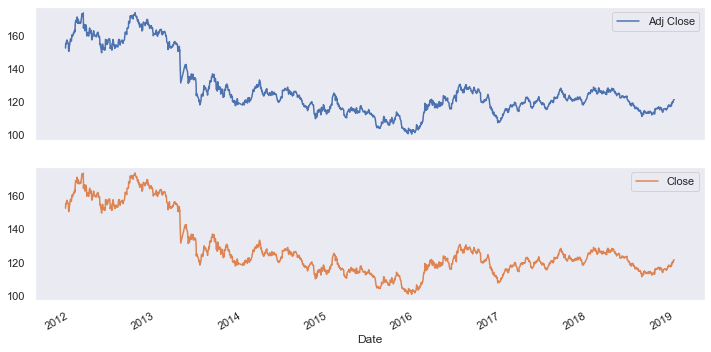

<Figure size 864x432 with 0 Axes>

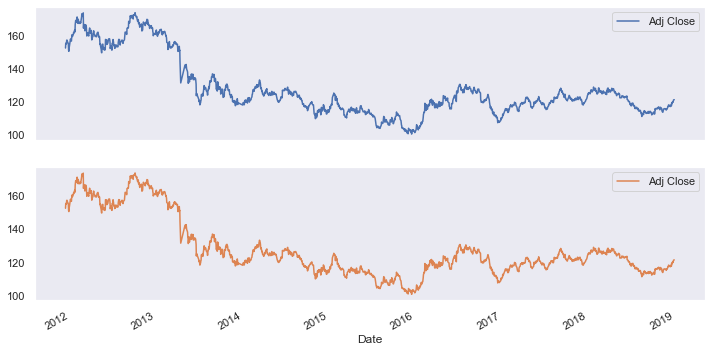

<Figure size 864x432 with 0 Axes>

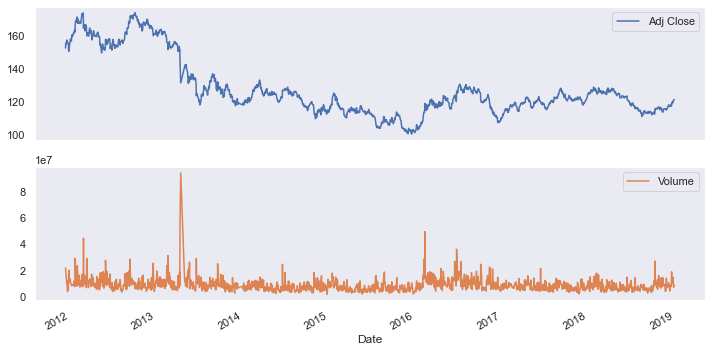

<Figure size 864x432 with 0 Axes>

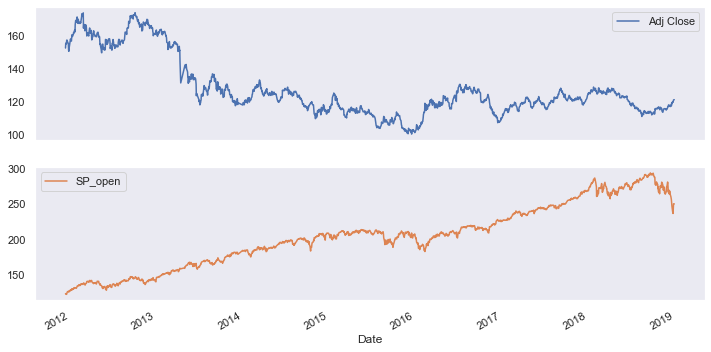

<Figure size 864x432 with 0 Axes>

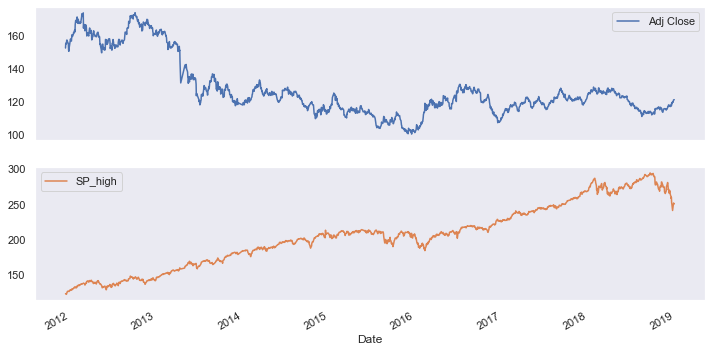

<Figure size 864x432 with 0 Axes>

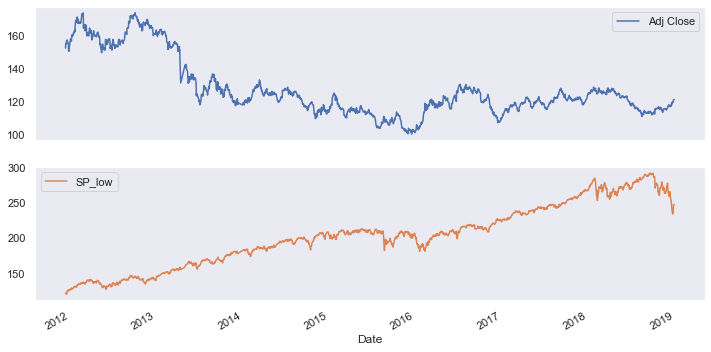

<Figure size 864x432 with 0 Axes>

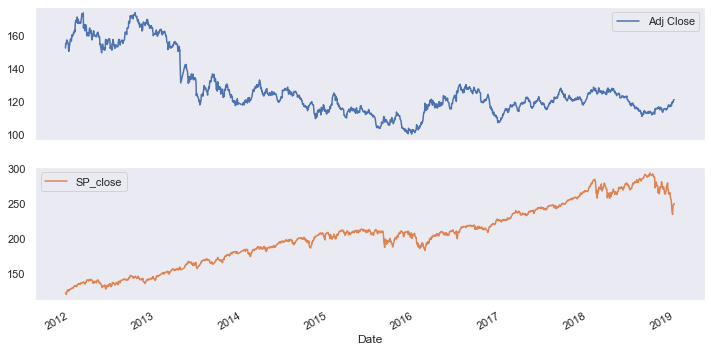

<Figure size 864x432 with 0 Axes>

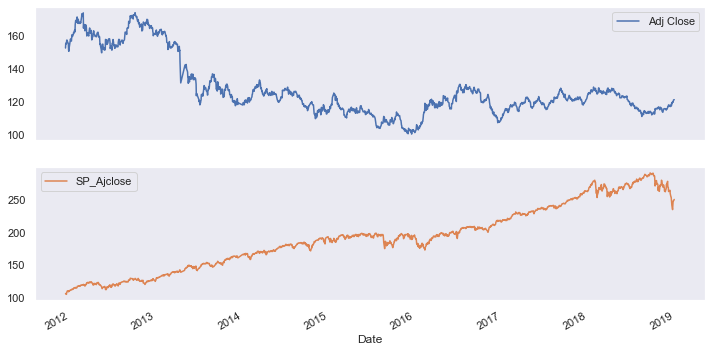

<Figure size 864x432 with 0 Axes>

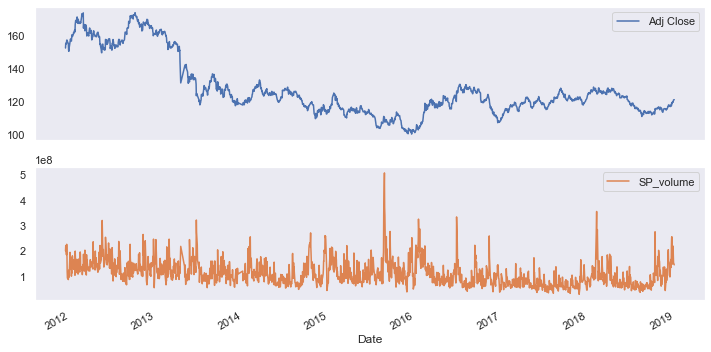

<Figure size 864x432 with 0 Axes>

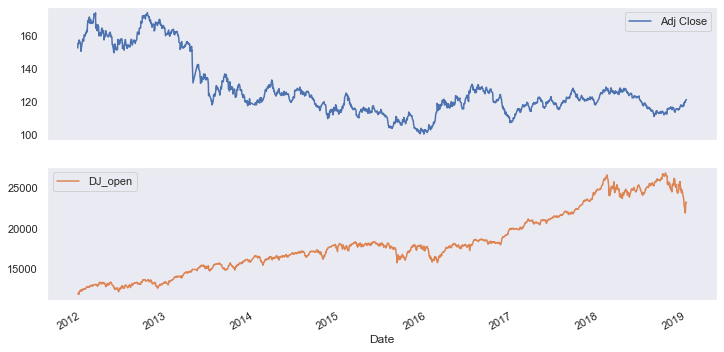

<Figure size 864x432 with 0 Axes>

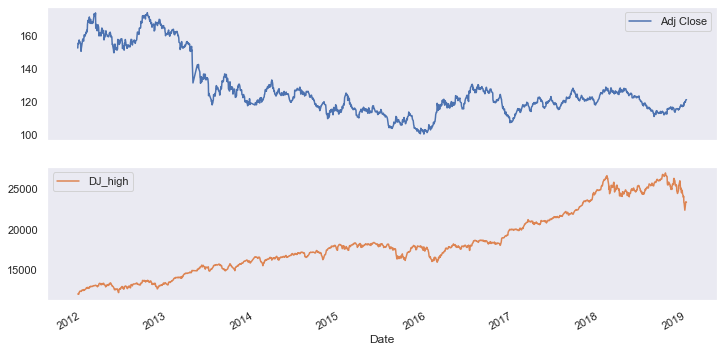

<Figure size 864x432 with 0 Axes>

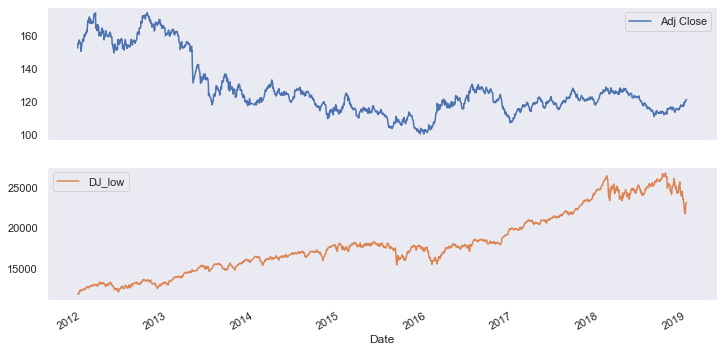

<Figure size 864x432 with 0 Axes>

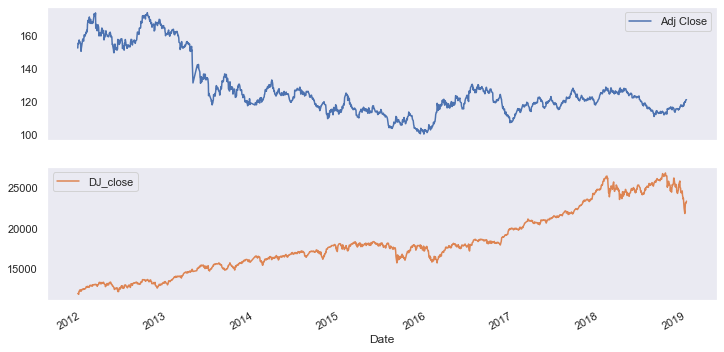

<Figure size 864x432 with 0 Axes>

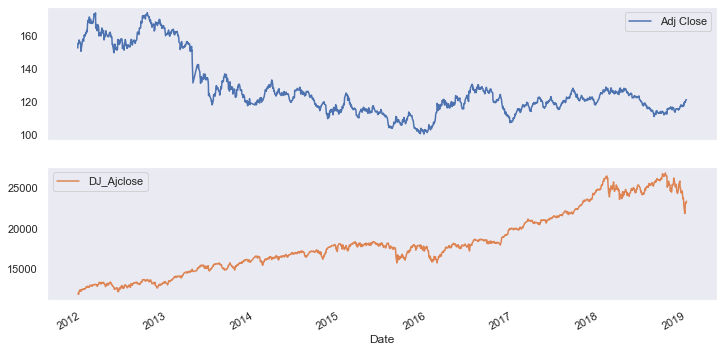

<Figure size 864x432 with 0 Axes>

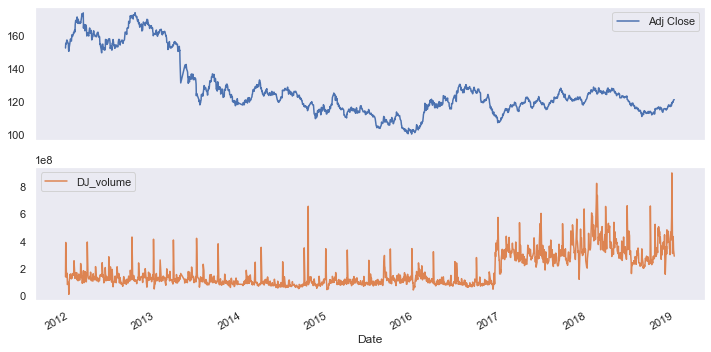

<Figure size 864x432 with 0 Axes>

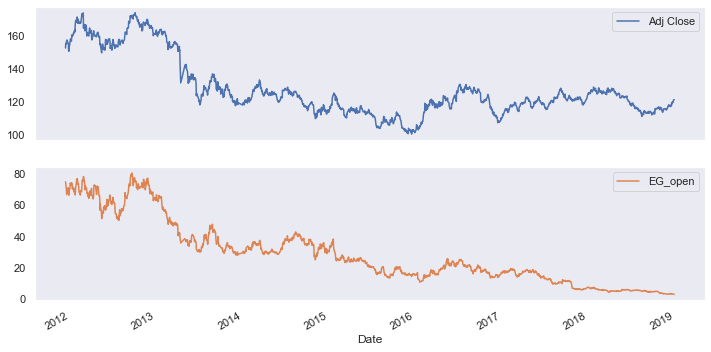

<Figure size 864x432 with 0 Axes>

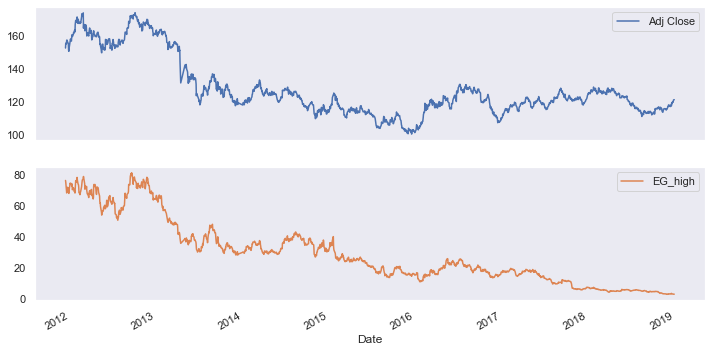

<Figure size 864x432 with 0 Axes>

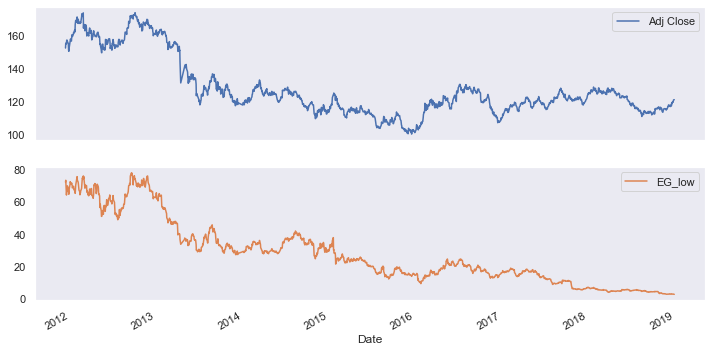

<Figure size 864x432 with 0 Axes>

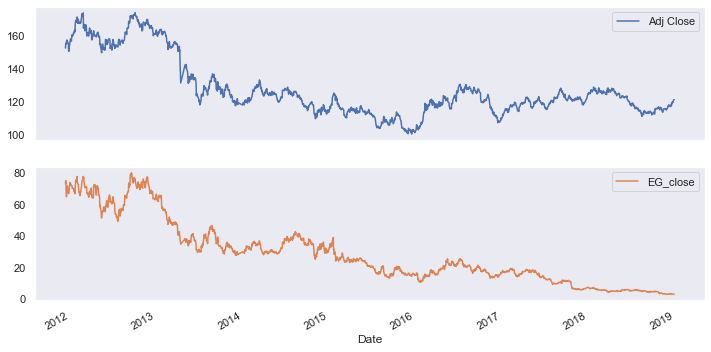

<Figure size 864x432 with 0 Axes>

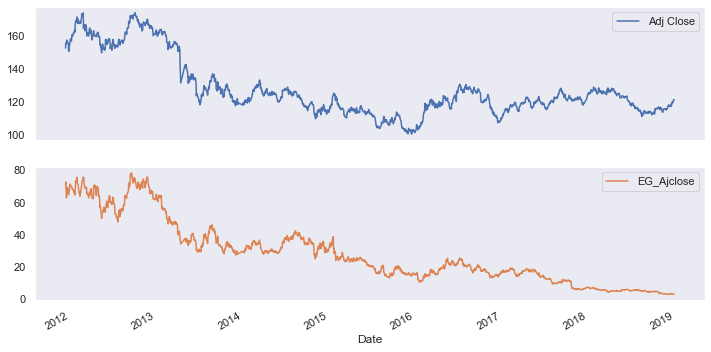

<Figure size 864x432 with 0 Axes>

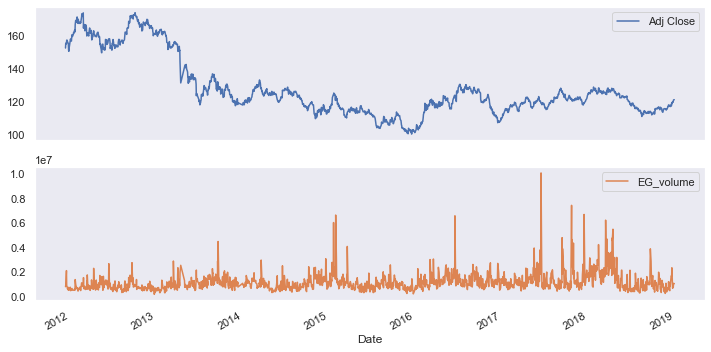

<Figure size 864x432 with 0 Axes>

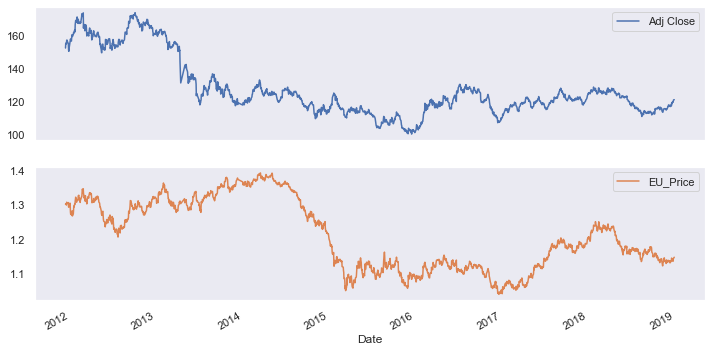

<Figure size 864x432 with 0 Axes>

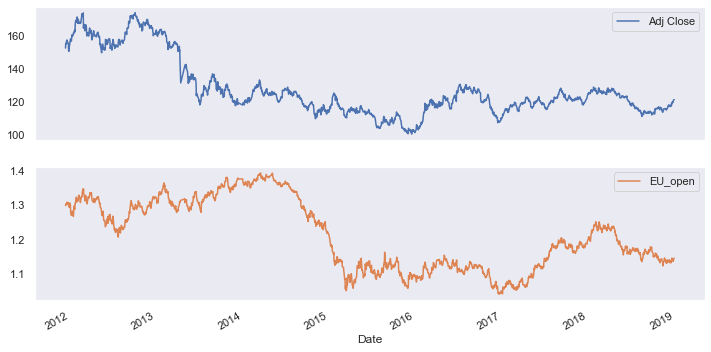

<Figure size 864x432 with 0 Axes>

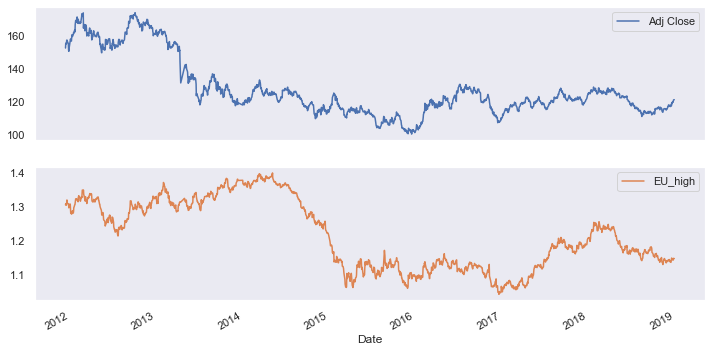

<Figure size 864x432 with 0 Axes>

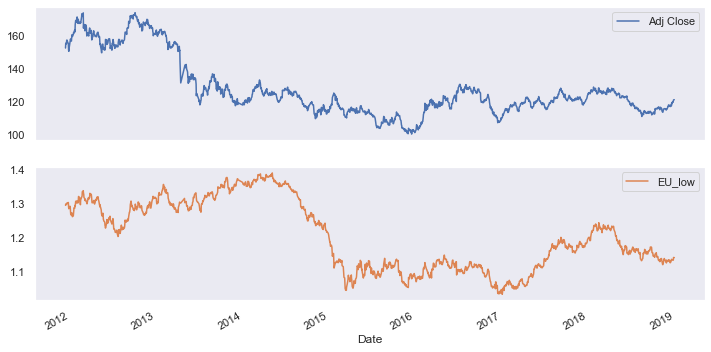

<Figure size 864x432 with 0 Axes>

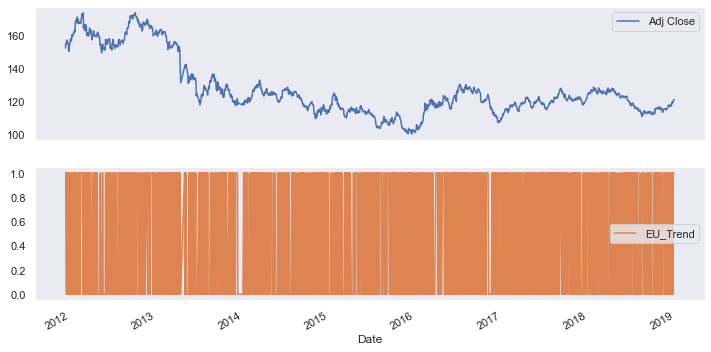

<Figure size 864x432 with 0 Axes>

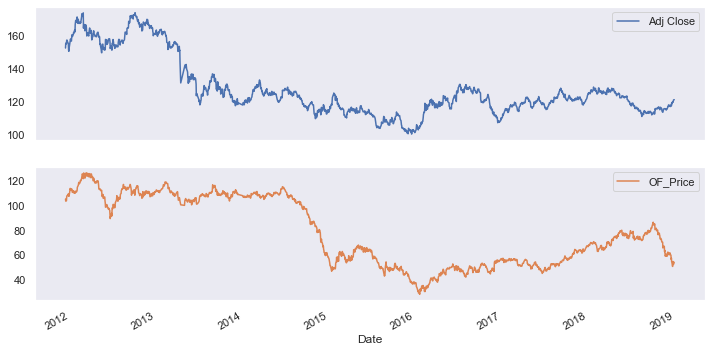

<Figure size 864x432 with 0 Axes>

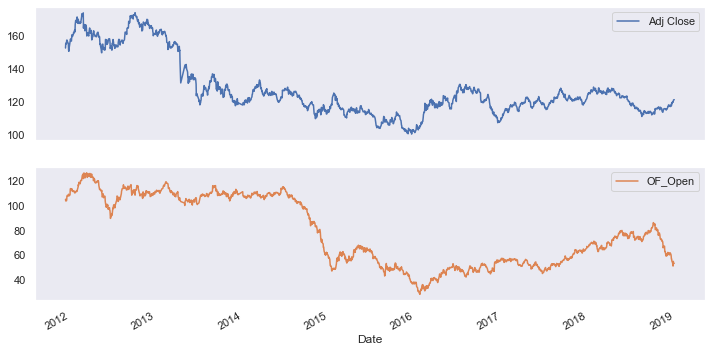

<Figure size 864x432 with 0 Axes>

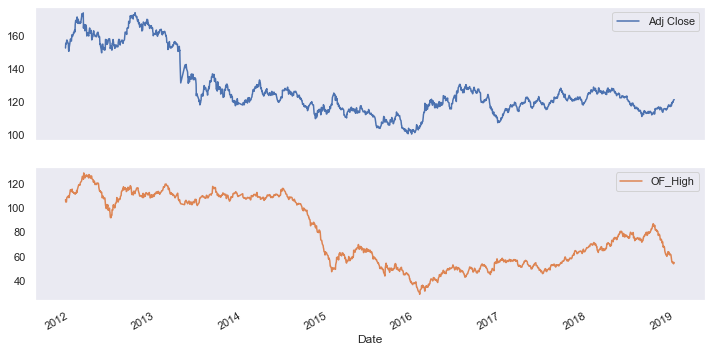

<Figure size 864x432 with 0 Axes>

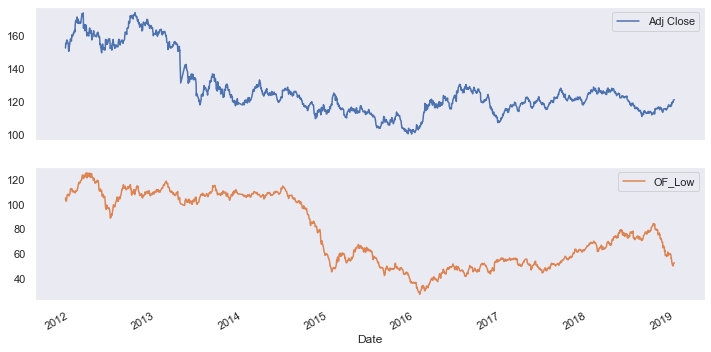

<Figure size 864x432 with 0 Axes>

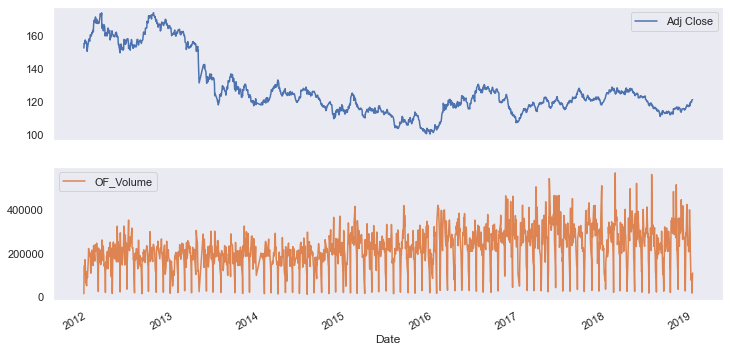

<Figure size 864x432 with 0 Axes>

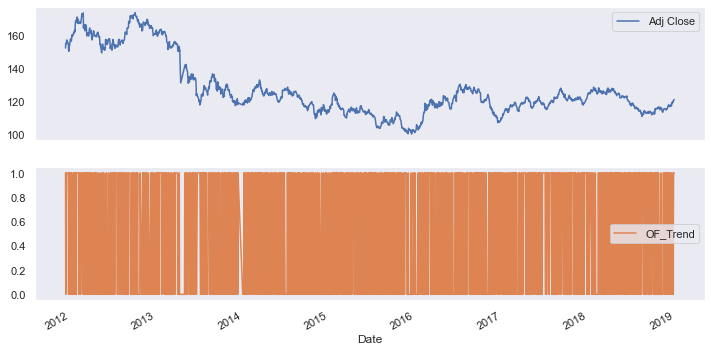

<Figure size 864x432 with 0 Axes>

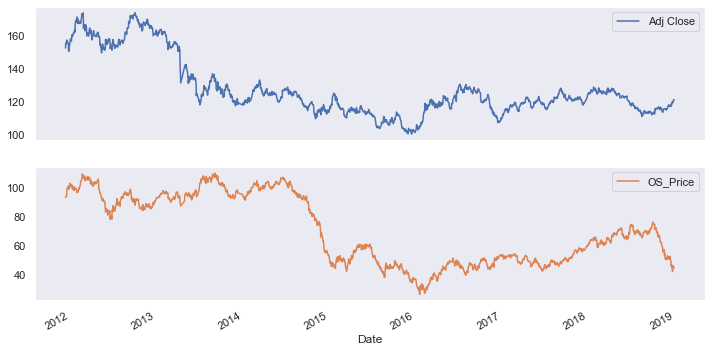

<Figure size 864x432 with 0 Axes>

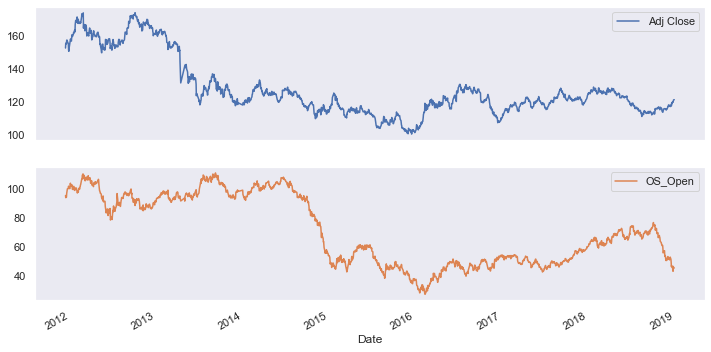

<Figure size 864x432 with 0 Axes>

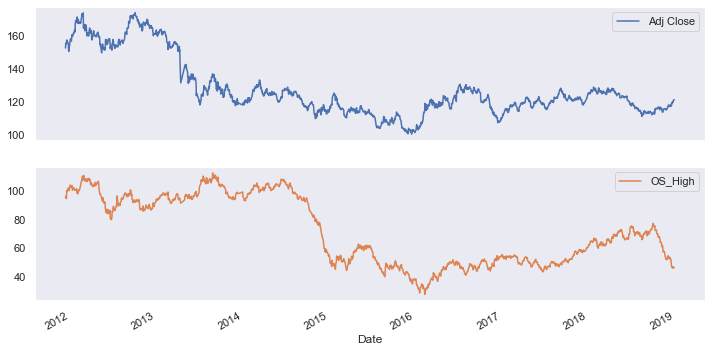

<Figure size 864x432 with 0 Axes>

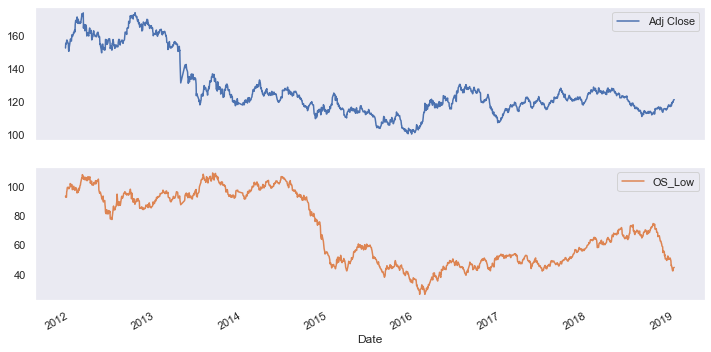

<Figure size 864x432 with 0 Axes>

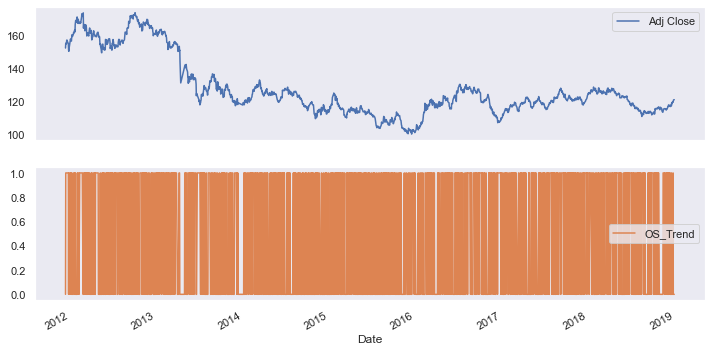

<Figure size 864x432 with 0 Axes>

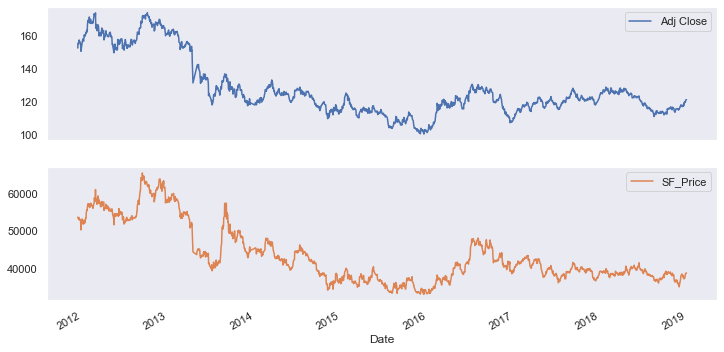

<Figure size 864x432 with 0 Axes>

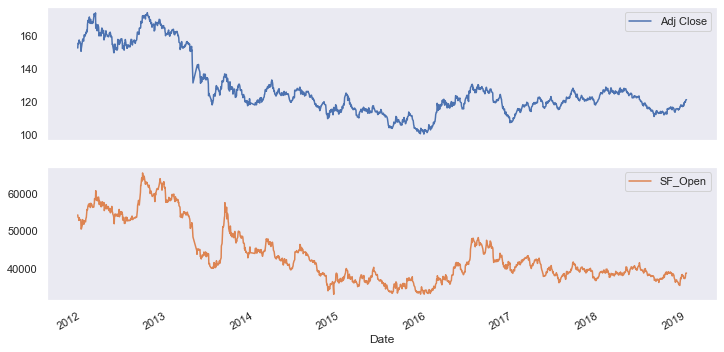

<Figure size 864x432 with 0 Axes>

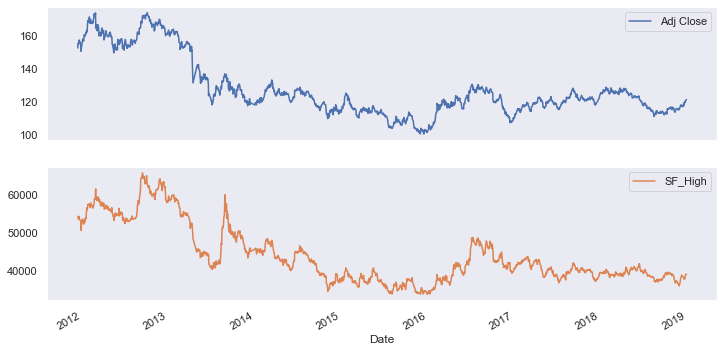

<Figure size 864x432 with 0 Axes>

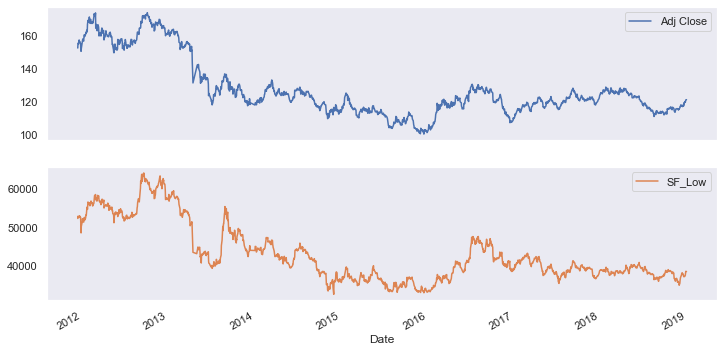

<Figure size 864x432 with 0 Axes>

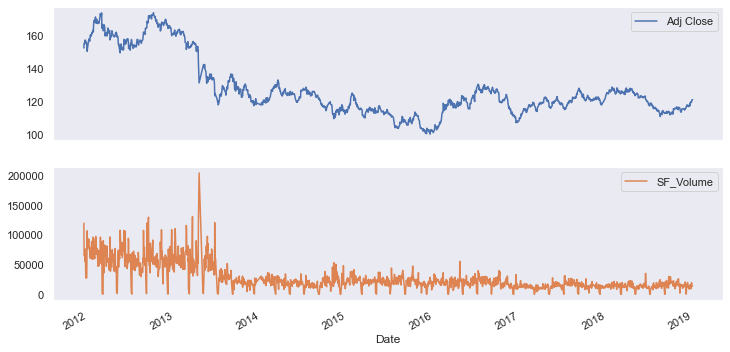

<Figure size 864x432 with 0 Axes>

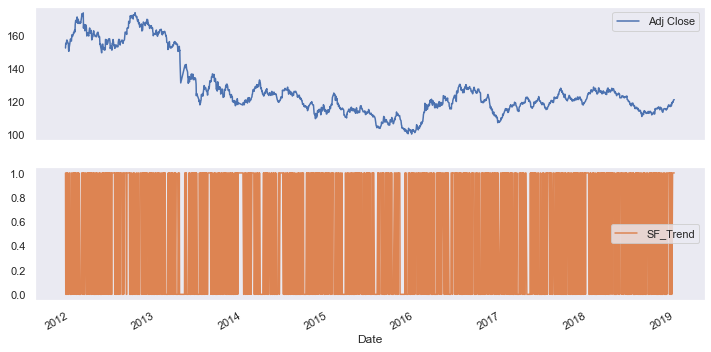

<Figure size 864x432 with 0 Axes>

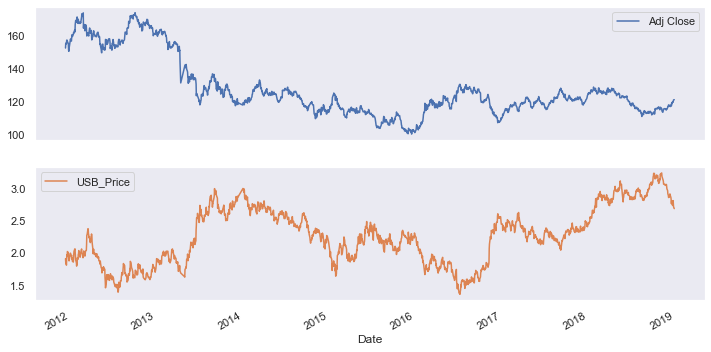

<Figure size 864x432 with 0 Axes>

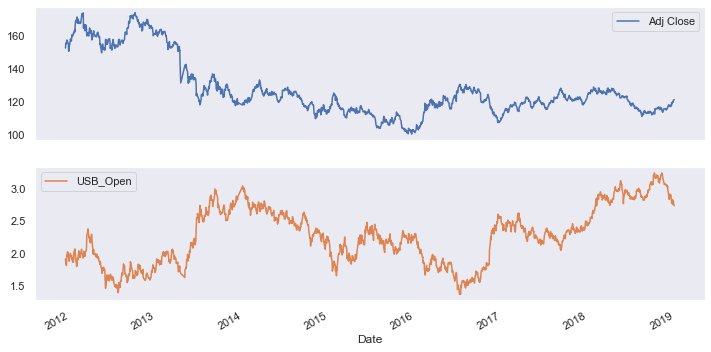

<Figure size 864x432 with 0 Axes>

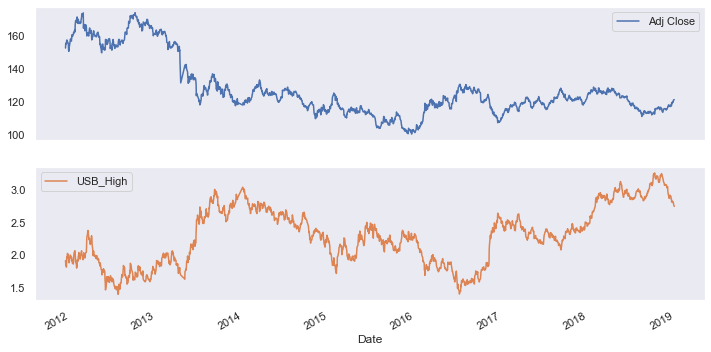

<Figure size 864x432 with 0 Axes>

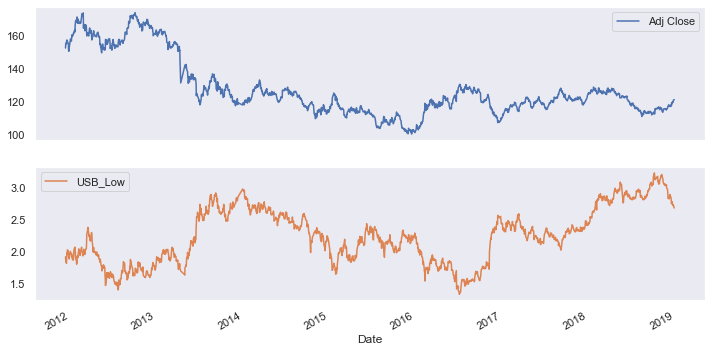

<Figure size 864x432 with 0 Axes>

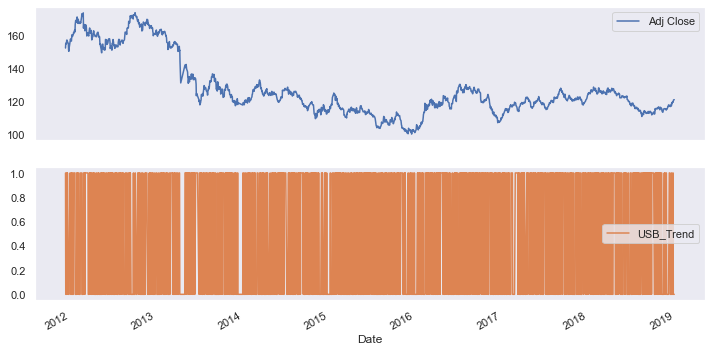

<Figure size 864x432 with 0 Axes>

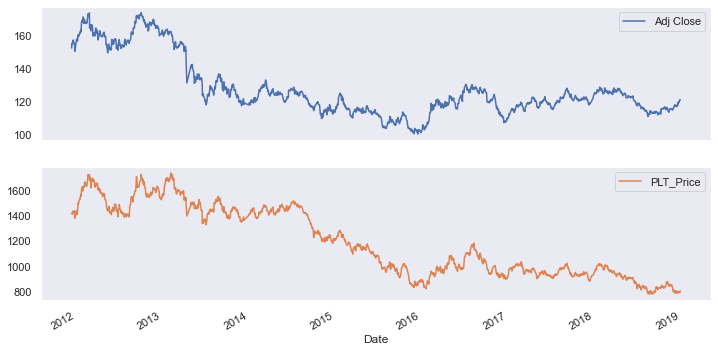

<Figure size 864x432 with 0 Axes>

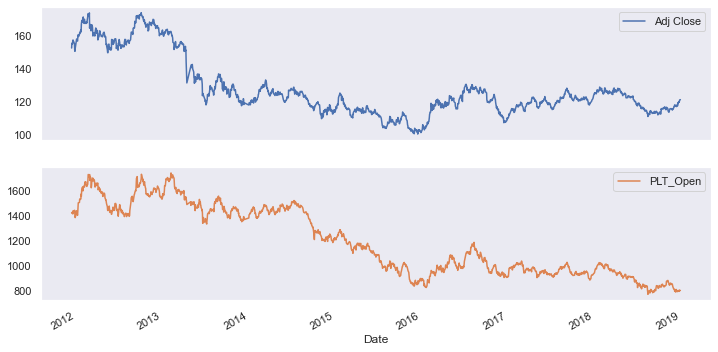

<Figure size 864x432 with 0 Axes>

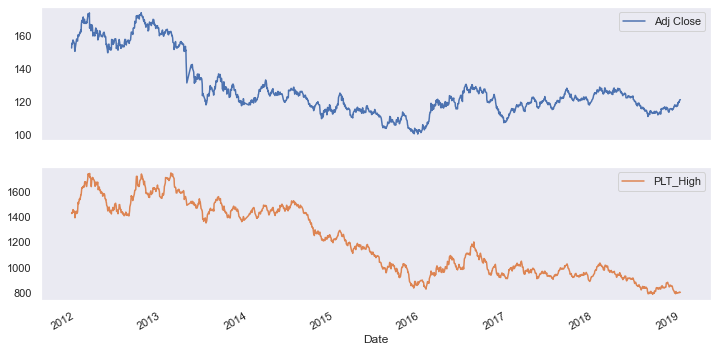

<Figure size 864x432 with 0 Axes>

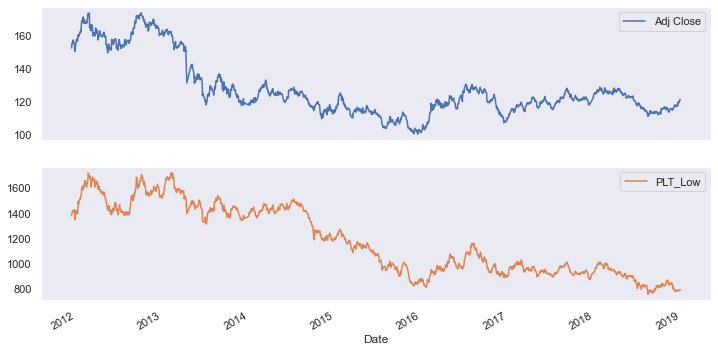

<Figure size 864x432 with 0 Axes>

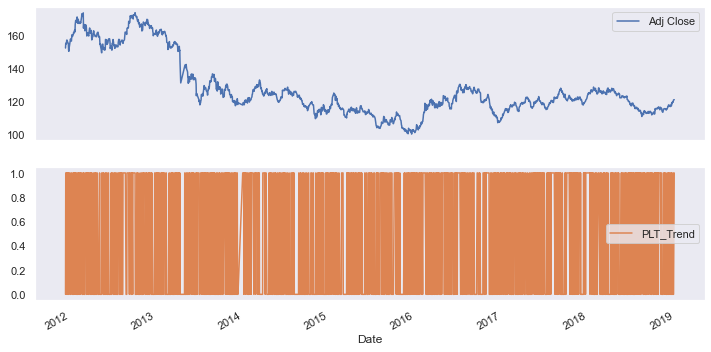

<Figure size 864x432 with 0 Axes>

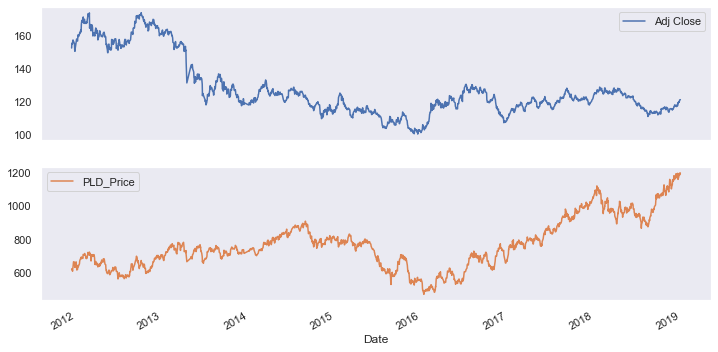

<Figure size 864x432 with 0 Axes>

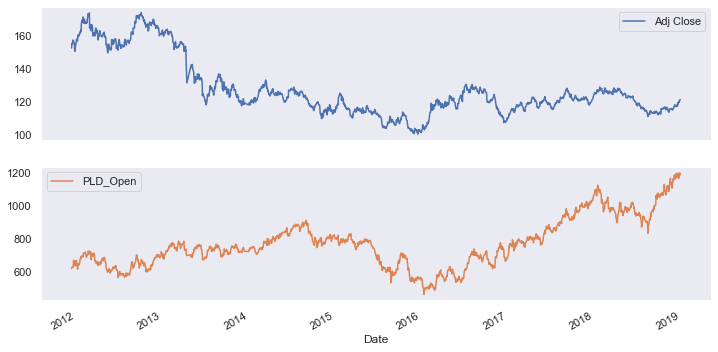

<Figure size 864x432 with 0 Axes>

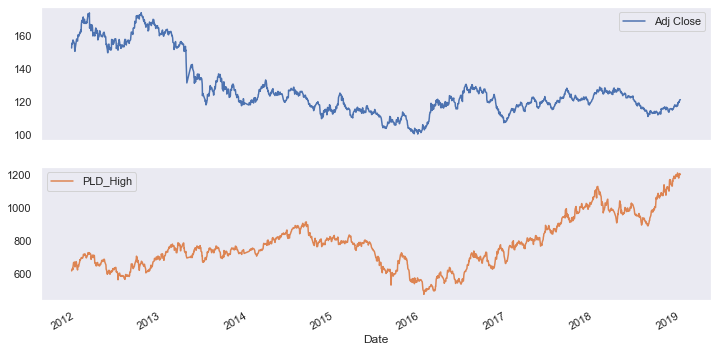

<Figure size 864x432 with 0 Axes>

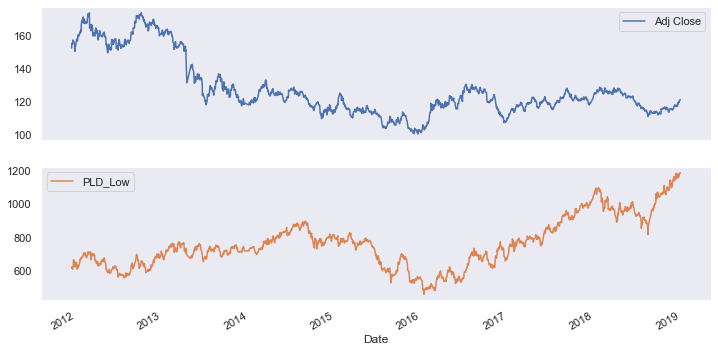

<Figure size 864x432 with 0 Axes>

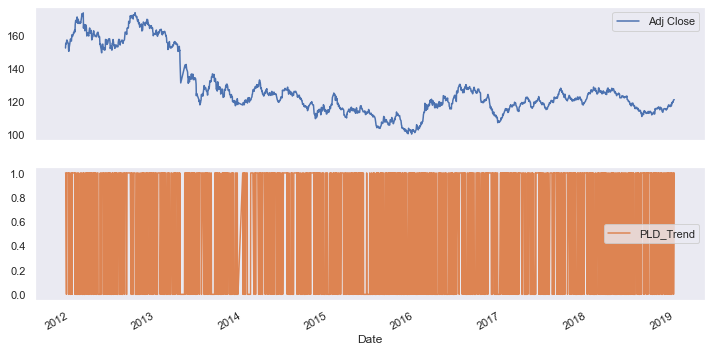

<Figure size 864x432 with 0 Axes>

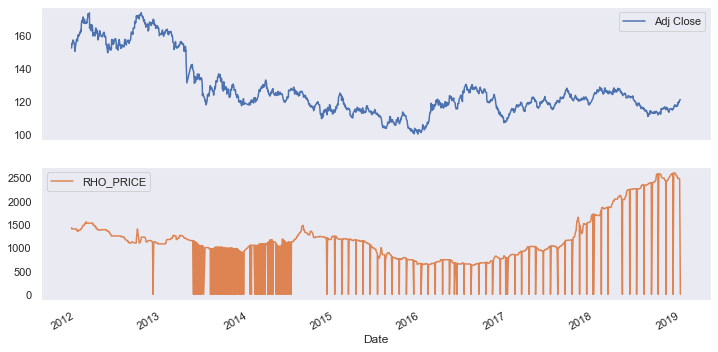

<Figure size 864x432 with 0 Axes>

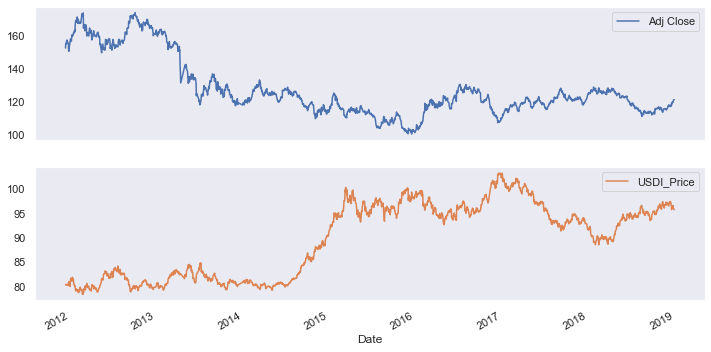

<Figure size 864x432 with 0 Axes>

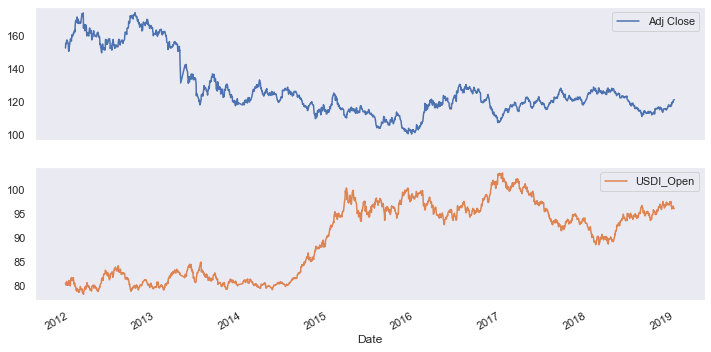

<Figure size 864x432 with 0 Axes>

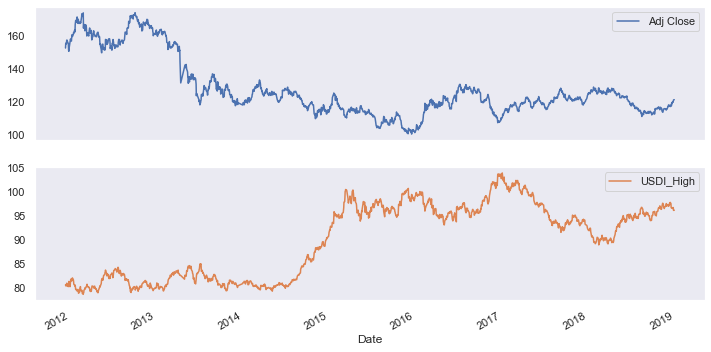

<Figure size 864x432 with 0 Axes>

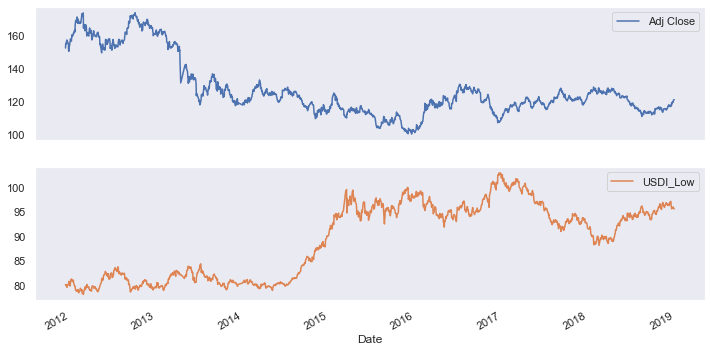

<Figure size 864x432 with 0 Axes>

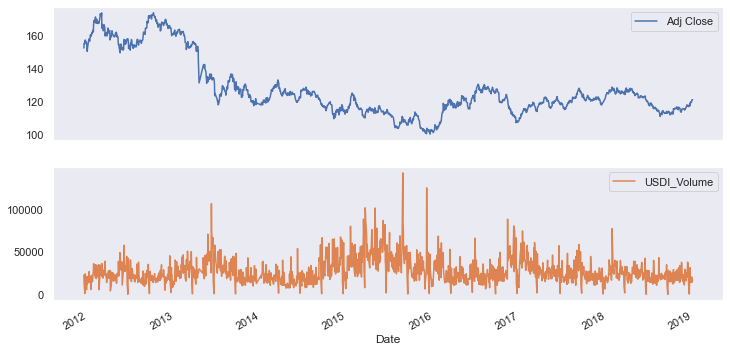

<Figure size 864x432 with 0 Axes>

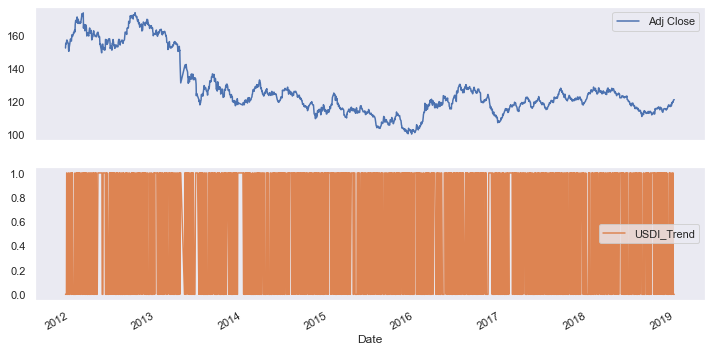

<Figure size 864x432 with 0 Axes>

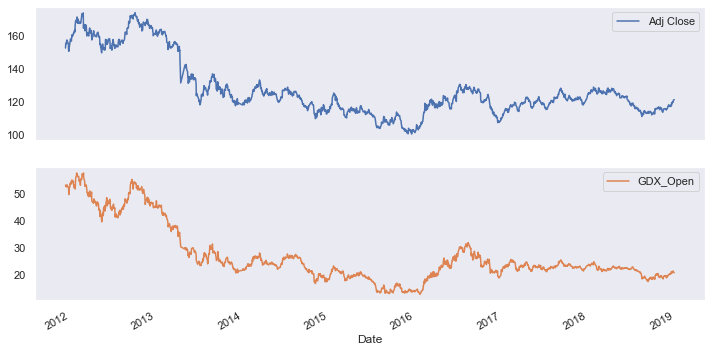

<Figure size 864x432 with 0 Axes>

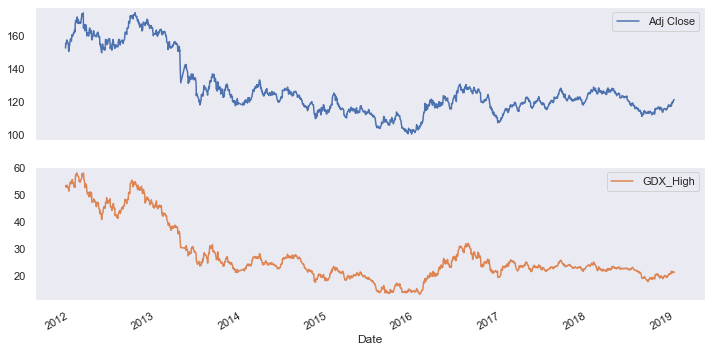

<Figure size 864x432 with 0 Axes>

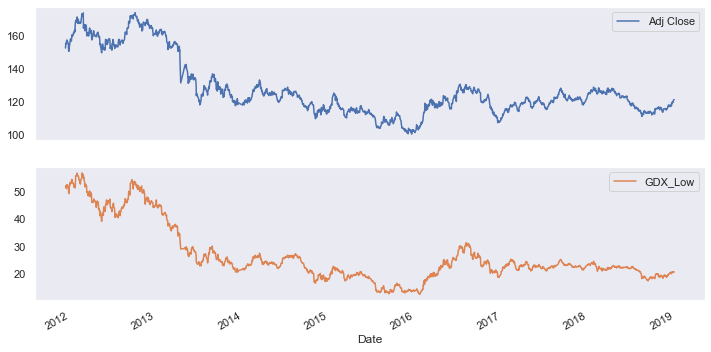

<Figure size 864x432 with 0 Axes>

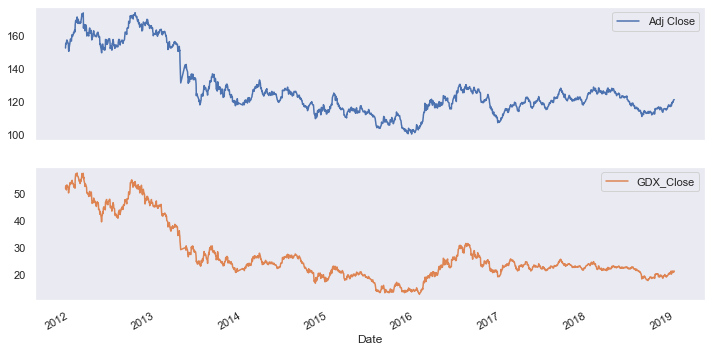

<Figure size 864x432 with 0 Axes>

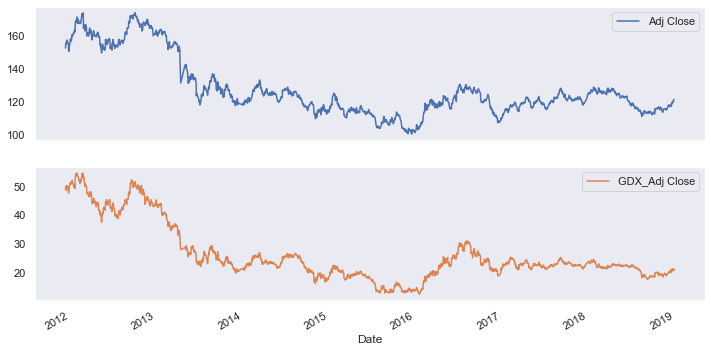

<Figure size 864x432 with 0 Axes>

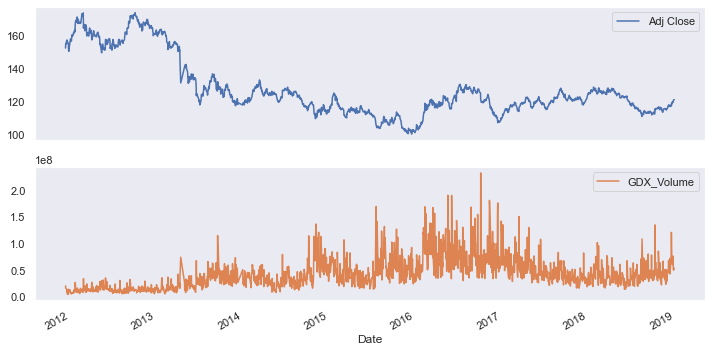

<Figure size 864x432 with 0 Axes>

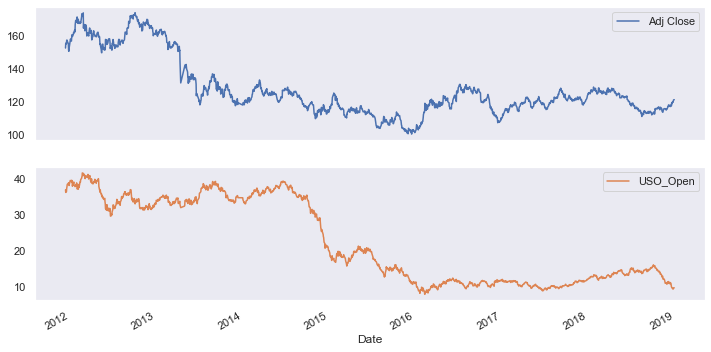

<Figure size 864x432 with 0 Axes>

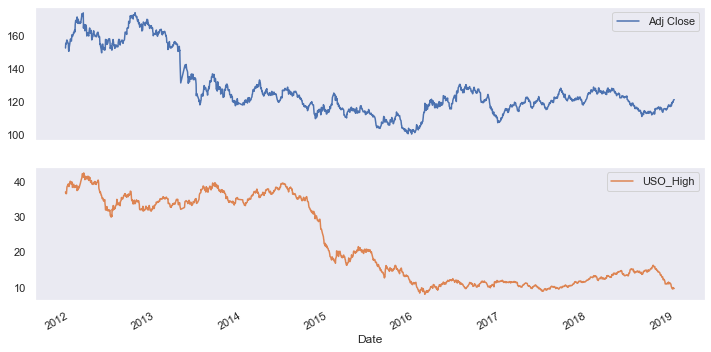

<Figure size 864x432 with 0 Axes>

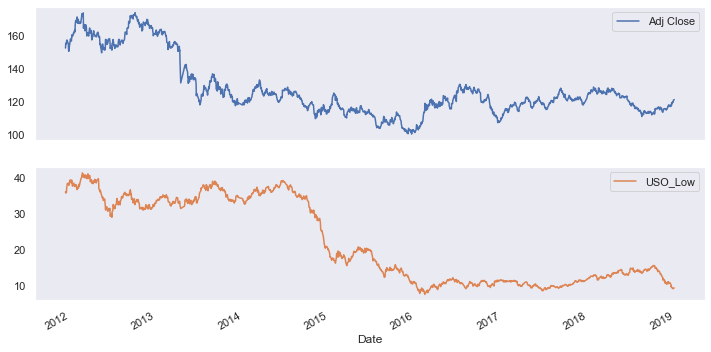

<Figure size 864x432 with 0 Axes>

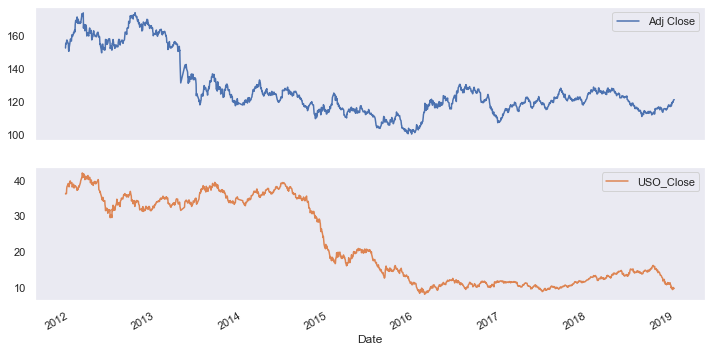

<Figure size 864x432 with 0 Axes>

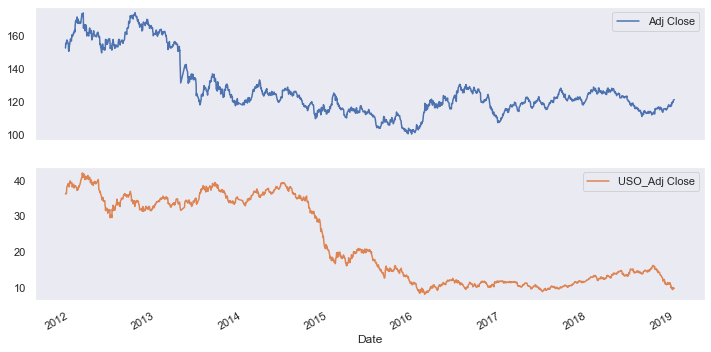

<Figure size 864x432 with 0 Axes>

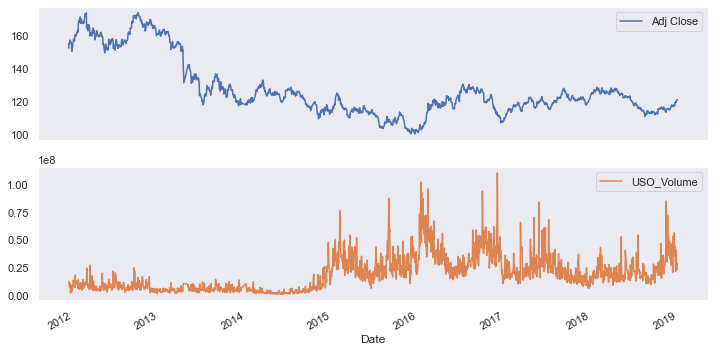

In [129]:
for col in df.columns:
    plt.figure(figsize=(12,6))
    df[['Adj Close',col]].plot.line(subplots=True, figsize=(12, 6))
    plt.savefig(f'img/AdjClose{col}.png', dpi=200)
    plt.show()

In [ ]:
# fig = px.density_contour(df, x=df.index, y=df['Adj Close'], z=df['Volume'], color=df.index)
# fig